In [1]:
import pandas as pd
import collections
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path_data = "../data/videos_parsed"
path_stopwords = "../stopwords/serbo_croatian.csv"

# Loading data

In [4]:
def load_stopwords(file_path):
    """ Loads stopword file, returns a list of words
    """
    df = pd.read_csv(file_path)
    stopwords = list(df.values.flatten())
    first_word = df.columns[0]
    stopwords.append(first_word)
    return stopwords

In [5]:
data = pd.read_pickle(path_data)

In [6]:
stopwords = load_stopwords(path_stopwords)

# Filtering stop words

In [7]:
MISSING_STOPWORDS = ["i", "da", "je","u", "su", "na", "se", "za", "ne",
                     "će", "od", "sam", "iz", "samo", "sa", "mi", "o", "jer", "do",
                    "ali","ako","do","što","bili","bi","treba", "smo", "nama", "nam",
                     "a", "me", "to", "sebe", "svi", "deo", "nema", "čeka", "svih",
                    "neće", "našu", "iza", "ceo", "širom", "naši", "naša", "među", 
                    "celu","ga", "uz", "bila", "gori", "već", "niko", "sme", "pred", "mu",
                   "ću", "pa", "po", "bilo", "moji", "našeg", "bih", "ni", "ili", "tu", "ovu"]


In [8]:
data.head(2)

,title,published,tags,comments,likes,dislikes,favourites,views,guest_name,quote,tokens,2_gram,3_gram,page_name,year,month,month_from_start,week_day
0,INTERVJU: Slobodan Komazec - Vučić uništava dr...,2018-03-15,"[Balkan Info Intervju, Balkan Info, Балкан Инф...",88,250,19,0,9432,Slobodan Komazec,"Vučić uništava državu, jer ne zna ništa o ekon...","[vučić, uništava, državu, jer, ne, zna, ništa,...","[vučić uništava, uništava državu, državu jer, ...","[vučić uništava državu, uništava državu jer, d...",Slobodan_Komazec,2018,3,34,Thursday
1,INTERVJU: Jelena Maćić - Opozicija će ovakvim ...,2018-03-13,"[Balkan Info Intervju, Balkan Info, Балкан Инф...",465,493,254,0,51341,Jelena Maćić,Opozicija će ovakvim ponašanjem biti skroz izb...,"[opozicija, će, ovakvim, ponašanjem, biti, skr...","[opozicija će, će ovakvim, ovakvim ponašanjem,...","[opozicija će ovakvim, će ovakvim ponašanjem, ...",Jelena_Maćić,2018,3,34,Tuesday


In [9]:
all_words = sum(data.tokens.values, [])
print("Number of words used:", len(all_words))

Number of words used: 4419


In [10]:
unique_words = set(all_words)
print("Number of unique words used:", len(unique_words))

Number of unique words used: 1768


In [11]:
stopwords = stopwords + MISSING_STOPWORDS

In [12]:
def remove_stopwords(words, stopwords):
    """ Returns a lsit of 'informative' words
    """
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [13]:
words = remove_stopwords(all_words, stopwords)

In [14]:
print("Number of all words after removing stopwords:", len(words))

Number of all words after removing stopwords: 2923


In [15]:
print("Number of all unique after removing stopwords:", len(set(words)))

Number of all unique after removing stopwords: 1648


# Most frequent words 

In [16]:
def distribution_plot(frequencies, x_label, y_label, title, scale_x="linear", scale_y="linear"):
    plt.plot(frequencies)
    plt.yscale(scale_y)
    plt.xscale(scale_x)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [17]:
counter = collections.Counter(words)

In [18]:
word_frequency = counter.most_common()

In [19]:
frequencies_ordered = pd.DataFrame(word_frequency)[1].values

In [20]:
pd.DataFrame(word_frequency)[1].describe()

count    1648.000000
mean        1.773665
std         2.795453
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        74.000000
Name: 1, dtype: float64

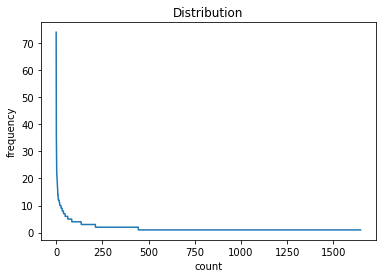

In [21]:
distribution_plot(frequencies_ordered, "count", "frequency", "Distribution")

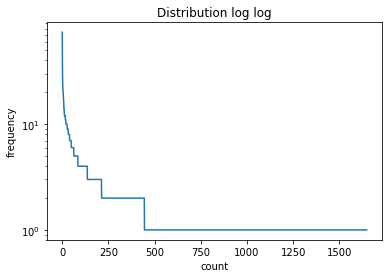

In [22]:
distribution_plot(frequencies_ordered, "count", "frequency", "Distribution log log", scale_y="log")

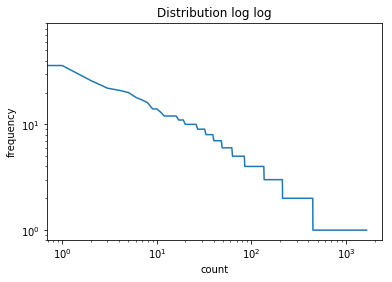

In [23]:
distribution_plot(frequencies_ordered, "count", "frequency", "Distribution log log", scale_x="log", scale_y="log")

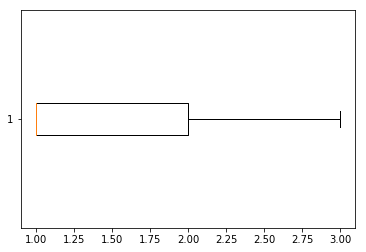

In [24]:
plt.boxplot(frequencies_ordered,showfliers=False, vert=False)
plt.show()

In [25]:
top50 = counter.most_common(50)

In [26]:
top10 = counter.most_common(10)

In [54]:
def plot_top_x(top_x,title):
    df = pd.DataFrame(top_x)
    df.index = df[0].values
    df.plot(kind="bar", title=title)
# top10.plot(kind='bar', title="Top 10 locations")
#     plt.figure(figsize=(30, 26))
    plt.ylabel('Frequency')
    plt.xlabel('n-gram')
#     plt.legend().set_visible(False)
    plt.show()

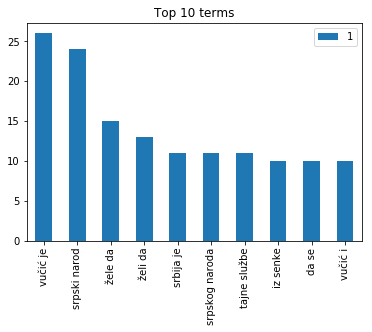

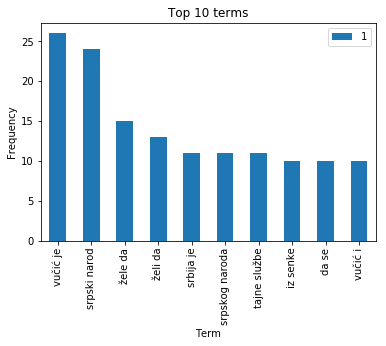

In [49]:
plot_top_x(top10, "Top 10 terms")

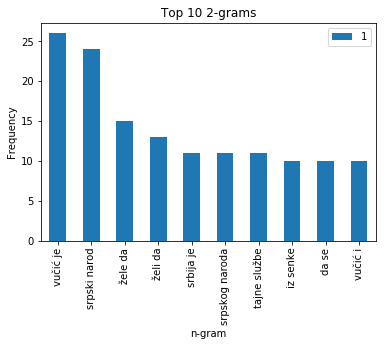

In [55]:
lst = sum(data["2_gram"].values, [])
counter = collections.Counter(lst)
top10 = counter.most_common(10)
plot_top_x(top10, "Top 10 2-grams")
plt.savefig("../figures/2_gram")

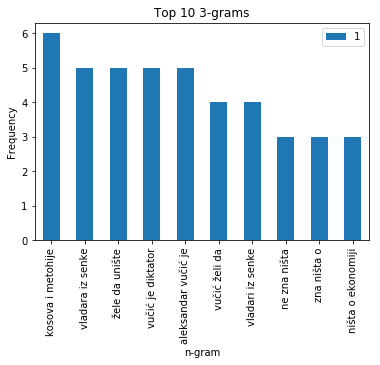

In [56]:
lst = sum(data["3_gram"].values, [])
counter = collections.Counter(lst)
top10 = counter.most_common(10)
plot_top_x(top10, "Top 10 3-grams")
plt.savefig("../figures/3_gram.png")